## Setting up the Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

## Retreiving the Data

In [ ]:
train = pd.read_csv('DataSet/train.csv')
train.shape

In [ ]:
test = pd.read_csv("DataSet/test.csv")
test.shape

## Our Data

In [2]:
train = pd.read_csv('Processed_DataSet/ProcessedData.csv')
print(train.shape)

first = train.columns[0]
train = train.drop(first,axis=1)

y_train = train.Activity
X_train = train.drop(['Activity'], axis=1)

(3255, 114)


## Data Cleaning

### Check for Duplicates

In [6]:
print("No of duplicatse in train: {}".format(sum(train.duplicated())))
# print("No of duplicatse in test: {}".format(sum(test.duplicated())))

No of duplicatse in train: 243


### Checking for NaN/null values

In [4]:
print("We have {} NaN/Null values in train".format(train.isnull().values.sum()))
# print("We have {} NaN/Null values in test".format(test.isnull().values.sum()))

We have 0 NaN/Null values in train


### Checking for data imbalance

In [10]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject', hue='Activity', data = train)
plt.show()

In [ ]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()

### Changing feature names

In [ ]:
columns = train.columns

# Removing punctuation from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

### Save this dataframe in a cvs file

In [ ]:
train.to_csv('f_train.csv', index=False)
test.to_csv('f_test.csv', index=False)

## Data Analysis

### Stationary vs Moving activities

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot, 'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,11), xytext=(-0.9,15),size=20,va='center',ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2,9),size=20,va='center',ha="left",arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [ ]:
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist=False,label='Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'],hist=False,label='Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'],hist=False,label='Laying')
plt.axis([-1.02, -0.5, 0, 17])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMagmean'],hist=False,label='Walking')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist=False,label='Walking Downstairs')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist=False,label='Walking Upstairs')

## Apply t-sne on the data

In [7]:
# performs t-sne with different perplexity values and their repective plots

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
    
    for index, perplexity in enumerate(perplexities):
        # perform t-sne
        print("\nPerforming tsne with perplexity {} and with {} iterations at max".format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare data for seaborn
        print("Creating plot for this t-sne visualization")
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1], 'label':y_data})
        
        # draw the plot in appropriate palce in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1",markers=['^','v','s','o','1'])
        plt.title("perplexity : {} and max_iter: {}".format(perplexity, n_iter))
        img_name = "Pics/"+img_name_prefix + "_perp_{}_iter_{}.png".format(perplexity,n_iter)
        print("Saving this plot as image in Pics directory...")
        plt.savefig(img_name)
        plt.show()
        print("Done")

In [8]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']

perform_tsne(X_data = X_pre_tsne, y_data = y_pre_tsne, perplexities = [5,10,20])

KeyError: "['subject'] not found in axis"


Performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3255 samples in 0.002s...
[t-SNE] Computed neighbors for 3255 samples in 0.592s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3255
[t-SNE] Computed conditional probabilities for sample 2000 / 3255
[t-SNE] Computed conditional probabilities for sample 3000 / 3255
[t-SNE] Computed conditional probabilities for sample 3255 / 3255
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.081s
[t-SNE] Iteration 50: error = 101.7378693, gradient norm = 0.0600015 (50 iterations in 1.992s)
[t-SNE] Iteration 100: error = 86.5665436, gradient norm = 0.0462686 (50 iterations in 1.308s)
[t-SNE] Iteration 150: error = 83.1275635, gradient norm = 0.0217658 (50 iterations in 1.324s)
[t-SNE] Iteration 200: error = 81.7169495, gradient norm = 0.0193192 (50 iterations in 1.309s)
[t-SNE] Iteration 250: error = 80.9756393, gradient norm = 0.01467

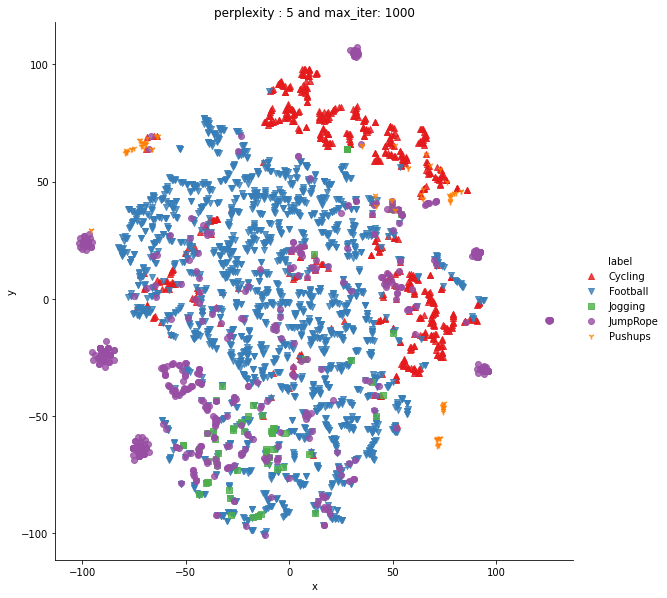

Done

Performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3255 samples in 0.001s...
[t-SNE] Computed neighbors for 3255 samples in 0.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3255
[t-SNE] Computed conditional probabilities for sample 2000 / 3255
[t-SNE] Computed conditional probabilities for sample 3000 / 3255
[t-SNE] Computed conditional probabilities for sample 3255 / 3255
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.167s
[t-SNE] Iteration 50: error = 91.8819733, gradient norm = 0.0730536 (50 iterations in 1.990s)
[t-SNE] Iteration 100: error = 80.0470352, gradient norm = 0.0164763 (50 iterations in 1.398s)
[t-SNE] Iteration 150: error = 78.2710571, gradient norm = 0.0134297 (50 iterations in 1.433s)
[t-SNE] Iteration 200: error = 77.6166382, gradient norm = 0.0076503 (50 iterations in 1.278s)
[t-SNE] Iteration 250: error = 77.3135681, gradient norm = 0.

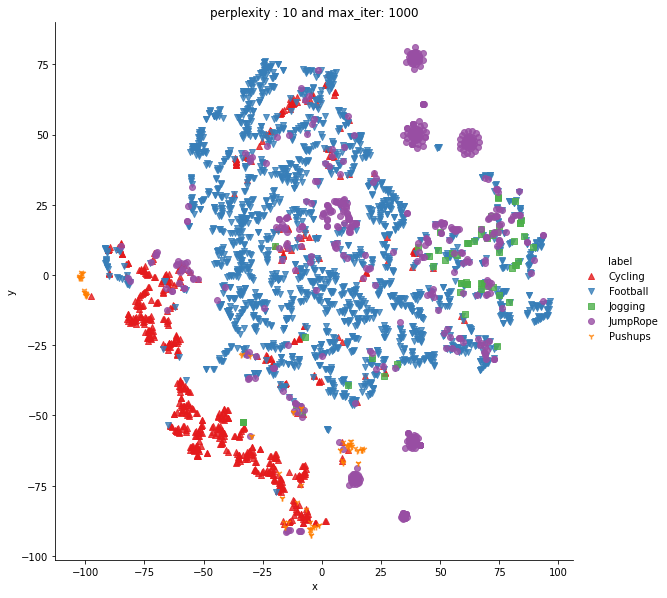

Done

Performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 3255 samples in 0.000s...
[t-SNE] Computed neighbors for 3255 samples in 0.567s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3255
[t-SNE] Computed conditional probabilities for sample 2000 / 3255
[t-SNE] Computed conditional probabilities for sample 3000 / 3255
[t-SNE] Computed conditional probabilities for sample 3255 / 3255
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.382s
[t-SNE] Iteration 50: error = 83.7576447, gradient norm = 0.0650147 (50 iterations in 1.904s)
[t-SNE] Iteration 100: error = 74.2393188, gradient norm = 0.0140797 (50 iterations in 1.566s)
[t-SNE] Iteration 150: error = 73.2032700, gradient norm = 0.0059080 (50 iterations in 1.629s)
[t-SNE] Iteration 200: error = 72.8874130, gradient norm = 0.0081906 (50 iterations in 1.609s)
[t-SNE] Iteration 250: error = 72.7634048, gradient norm = 0.

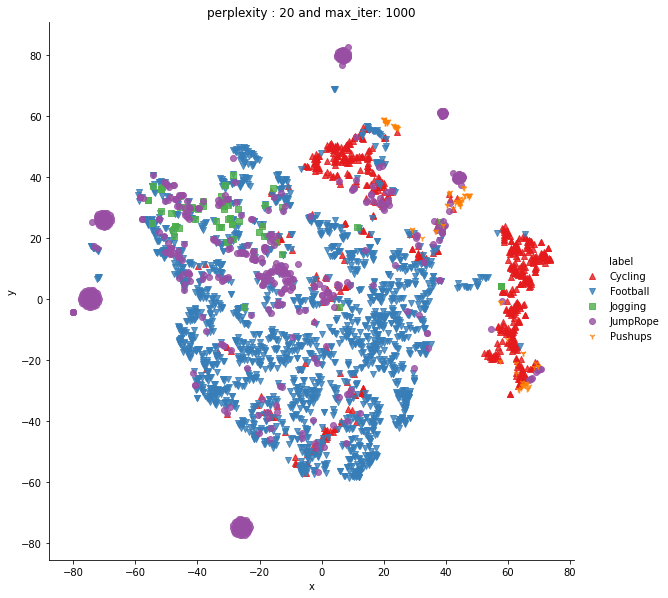

Done


In [9]:
perform_tsne(X_data = X_train, y_data = y_train, perplexities = [5,10,20])